In [ ]:

import kagglehub
path = kagglehub.dataset_download('architsharma01/loan-approval-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [5]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate

import warnings

warnings.filterwarnings("ignore")

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
loan_original = pd.read_csv("data.csv")
loan_original.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


We already got a basic picture of this dataset, let's run some data cleaning scans as usual.

In [11]:
loan_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [12]:
loan_original.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [13]:
loan_original[loan_original['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


Except `loan_id`, all the column names contain a space in front of the text, we need to trim them up to avoid future confusions.

In [14]:
loan_original.columns = loan_original.columns.str.replace(' ', '')

In [15]:
loan = loan_original.drop(['loan_id'], axis=1)

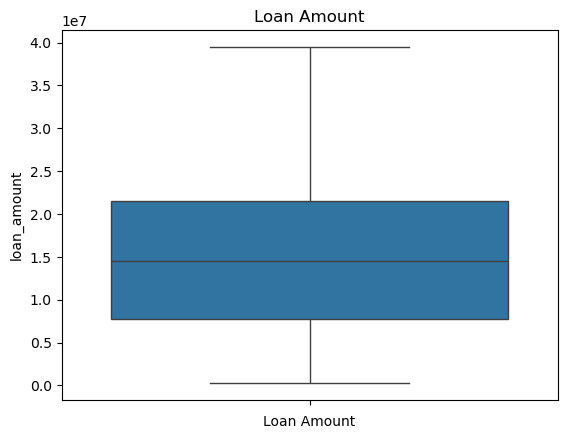

In [16]:
# no outliers?

sns.boxplot(loan['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

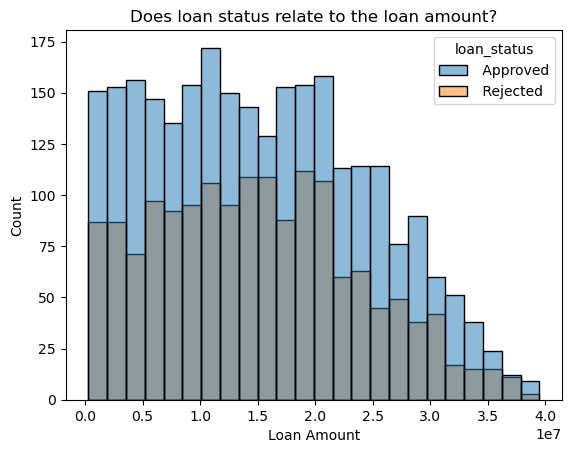

In [17]:
sns.histplot(loan, x='loan_amount', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

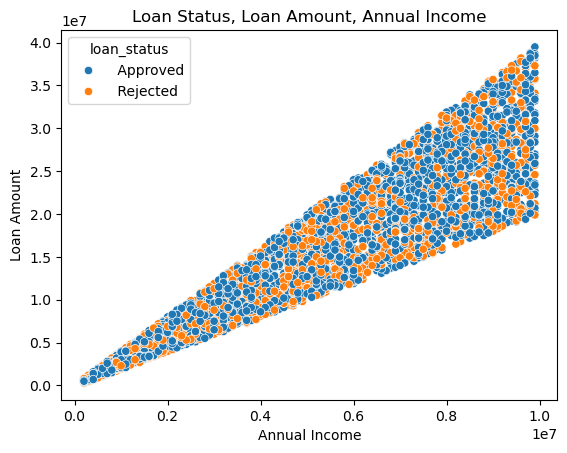

In [18]:
sns.scatterplot(x=loan['income_annum'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

In [19]:
loan.loc[(loan['income_annum'] == loan['income_annum'].max()) & (loan['loan_status'] ==' Rejected')]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
82,2,Not Graduate,Yes,9900000,21200000,16,363,25500000,11400000,26600000,6800000,Rejected
157,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
1179,5,Graduate,No,9900000,35700000,10,392,7900000,4300000,39200000,13000000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1409,3,Graduate,Yes,9900000,29900000,20,490,10500000,9100000,27100000,7400000,Rejected
1547,1,Graduate,Yes,9900000,34100000,14,371,24400000,7100000,29300000,6200000,Rejected
1890,5,Graduate,No,9900000,24600000,2,530,24200000,12800000,20400000,13000000,Rejected
2862,4,Graduate,No,9900000,30000000,18,496,10400000,8000000,29300000,13800000,Rejected
2869,4,Graduate,No,9900000,26100000,2,481,14500000,5000000,23600000,9300000,Rejected
3000,1,Not Graduate,Yes,9900000,25700000,2,340,15600000,18800000,29500000,11800000,Rejected


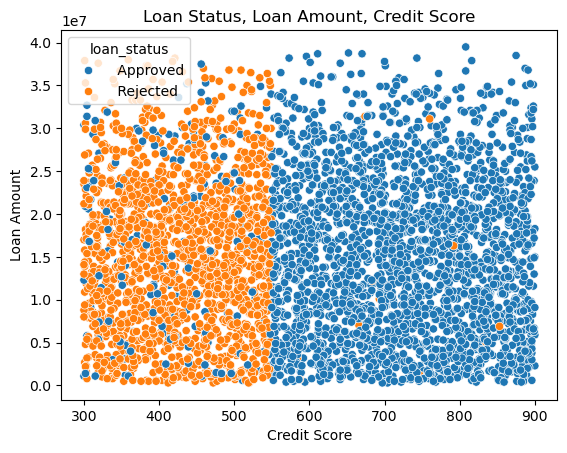

In [20]:
sns.scatterplot(x=loan['cibil_score'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

In [21]:
loan.loc[(loan['cibil_score'] > 740) & (loan['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
3527,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
911,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
236,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
4099,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected
1446,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected


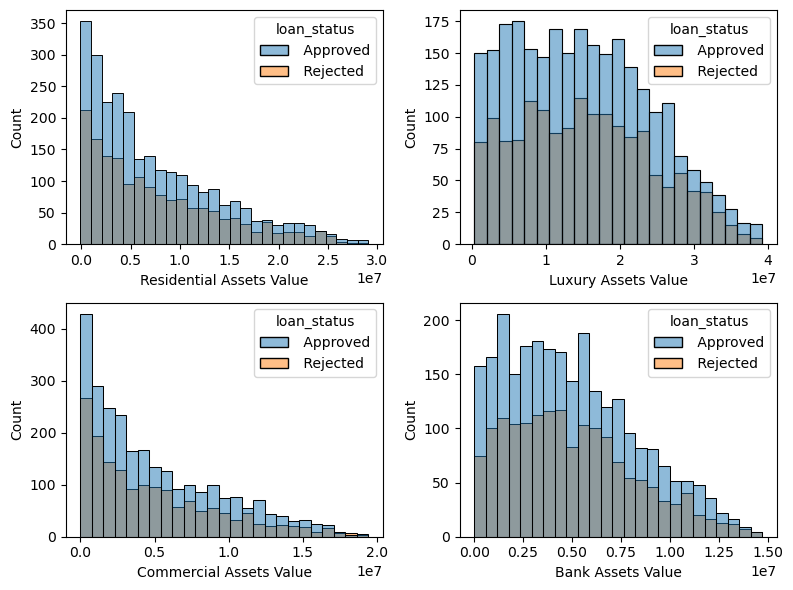

In [22]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(loan, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(loan, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(loan, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(loan, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [24]:
cross_loan_term = pd.crosstab(index=loan['loan_term'], columns=loan['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected']
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status,Approved,Rejected,Total,Approved_percentage,Rejected_percentage
loan_term,,,,,
2,315,89,404,77.970297,22.029703
4,366,81,447,81.879195,18.120805
6,282,208,490,57.551020,42.448980
8,220,166,386,56.994819,43.005181
10,229,207,436,52.522936,47.477064
12,276,180,456,60.526316,39.473684
14,239,166,405,59.012346,40.987654
16,236,176,412,57.281553,42.718447
18,257,165,422,60.900474,39.099526


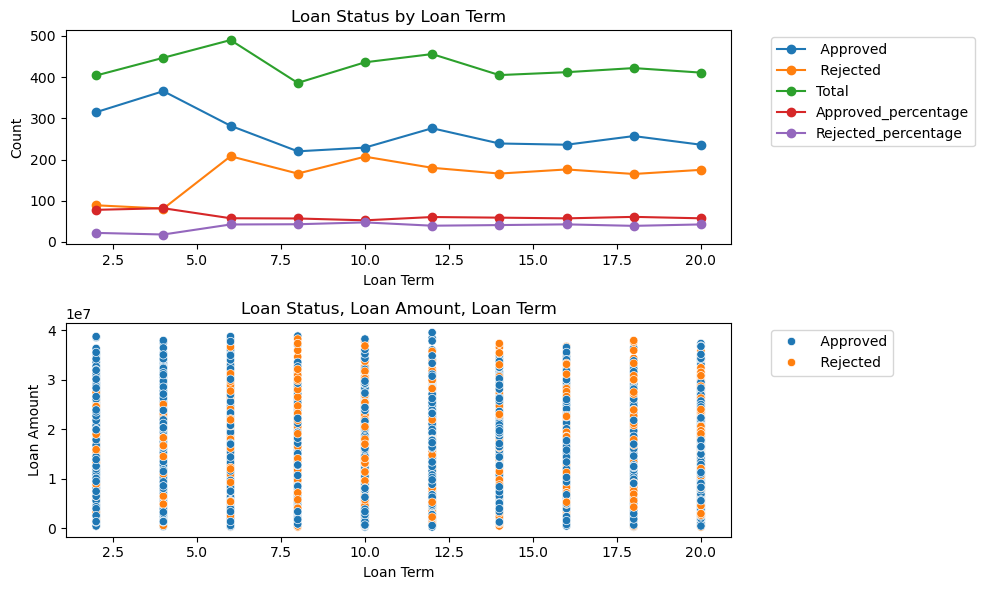

In [25]:
fig,axes = plt.subplots(2,1, figsize=(10,6))
cross_loan_term.plot(kind='line', marker='o', ax = axes[0])
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].set_title('Loan Status by Loan Term')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

sns.scatterplot(loan, x = 'loan_term', y = 'loan_amount', hue = 'loan_status', ax = axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
loan.loc[(loan['loan_term'] <=4) & (loan['loan_status'] ==' Rejected')].sort_values(['loan_amount']).head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1388,4,Graduate,Yes,300000,500000,2,353,600000,100000,1200000,400000,Rejected
1061,3,Not Graduate,No,300000,500000,2,477,700000,200000,800000,400000,Rejected
3393,5,Not Graduate,No,300000,600000,4,418,500000,200000,700000,200000,Rejected
1199,2,Not Graduate,No,300000,600000,2,383,600000,300000,1100000,400000,Rejected
949,2,Graduate,Yes,300000,700000,4,411,600000,0,1200000,100000,Rejected
853,3,Not Graduate,No,300000,800000,2,458,500000,0,1100000,200000,Rejected
519,2,Graduate,Yes,500000,1300000,4,427,1400000,500000,1800000,600000,Rejected
2643,4,Graduate,No,600000,1400000,4,507,200000,300000,1700000,400000,Rejected
1012,5,Graduate,Yes,500000,1400000,4,471,500000,100000,1300000,300000,Rejected
3475,5,Not Graduate,No,700000,1400000,4,344,1500000,800000,2600000,300000,Rejected


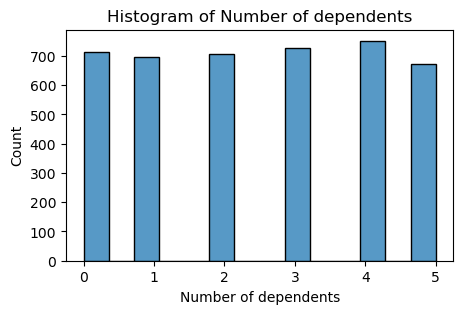

In [27]:
plt.figure(figsize = (5,3))
sns.histplot(loan['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

In [28]:
cross_dependents = pd.crosstab(index=loan['no_of_dependents'], columns=loan['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents

loan_status,Approved,Rejected,Approved_percentage,Rejected_percentage
no_of_dependents,,,,
0,457,255,64.185393,35.814607
1,430,267,61.692970,38.307030
2,441,267,62.288136,37.711864
3,457,270,62.861073,37.138927
4,465,287,61.835106,38.164894
5,406,267,60.326895,39.673105


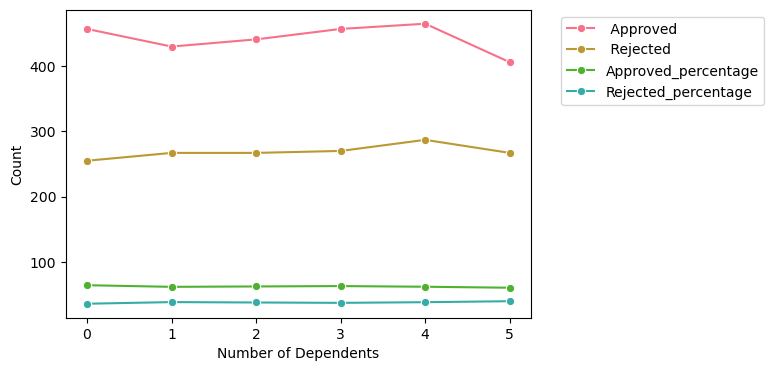

In [29]:
palette = sns.color_palette("husl")

plt.figure(figsize = (6,4))
sns.lineplot(data=cross_dependents, dashes=False, markers="o", palette=palette)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

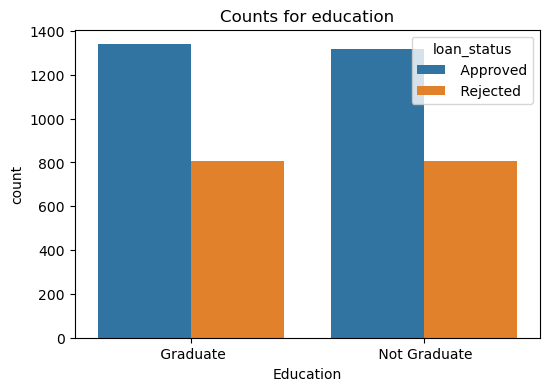

In [30]:
plt.figure(figsize = (6,4))
sns.countplot(loan, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

In [31]:
education = loan.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"),
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")

).round(2).reset_index(drop=True)

education

,education,count_by_education,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,Graduate,2144,5100000.0,15229151.12,599.14,10.85,7543376.87,4943610.07,15239319.03,5007182.84
1,Not Graduate,2125,5000000.0,15036894.12,600.74,10.95,7401223.53,5002964.71,15012282.35,4945929.41


In [32]:
self_employed = loan.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"),
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")

).round(2).reset_index(drop=True)

self_employed

,self_employed,count,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,No,2119,5100000.0,15120245.40,600.78,10.88,7432373.76,5052713.54,15085842.38,4977395.0
1,Yes,2150,5100000.0,15146465.12,599.10,10.92,7512279.07,4894744.19,15166186.05,4976000.0


In [34]:
# Create subset

ols_data = loan[['loan_amount','no_of_dependents','education','self_employed']]
ols_formula = "loan_amount ~ C(no_of_dependents) + C(education) + C(self_employed)"

In [35]:
OLS = ols(formula = ols_formula, data = ols_data)
ols_model = OLS.fit()

In [36]:
X_ols = ols_data[['no_of_dependents','education','self_employed']]

fitted_values = ols_model.predict(X_ols)

In [37]:
residuals = ols_model.resid

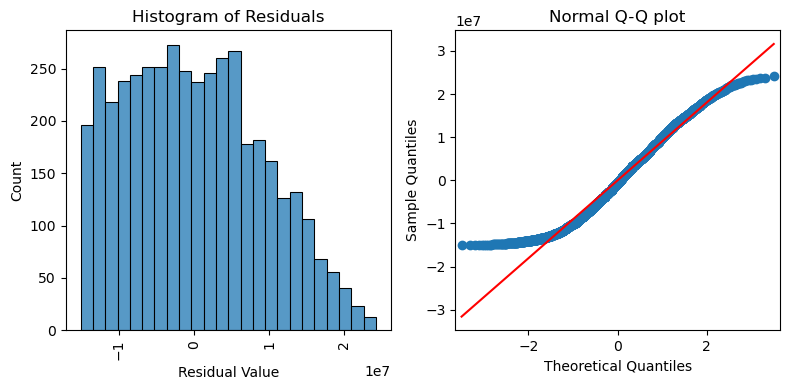

In [38]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
axes[0].tick_params(axis='x', rotation=90)

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()


In [39]:
loan_dummies = pd.get_dummies(loan)

In [40]:
loan_dummies.rename(columns = {'education_ Graduate':'education', 'self_employed_ Yes':'self_employed', 'loan_status_ Approved':'loan_status' }, inplace = True)

In [41]:
loan_dummies = loan_dummies.drop(['education_ Not Graduate', 'self_employed_ No', 'loan_status_ Rejected'], axis=1)

In [42]:
loan_dummies.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education', 'self_employed',
       'loan_status'],
      dtype='object')

Let's check the correlation score again!

In [43]:
loan_corr = loan_dummies.corr()

<Axes: >

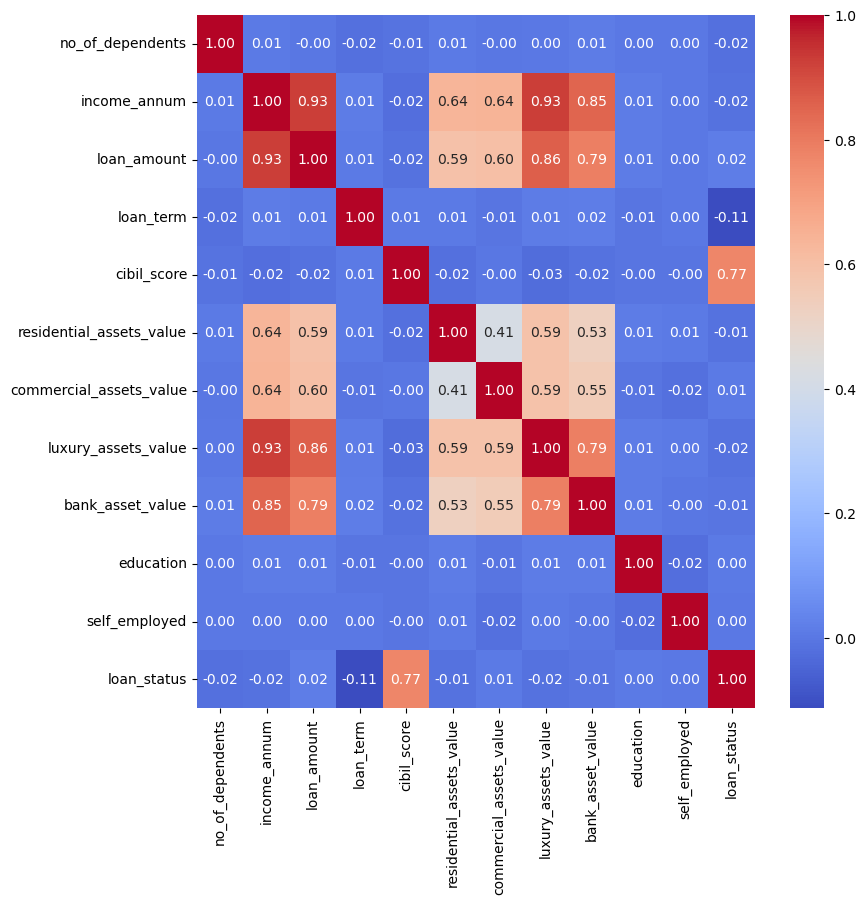

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(loan_corr, annot=True, fmt=".2f", cmap="coolwarm")

1. Over the heatmap above, we can now see the variable that affects the `loan_status` the most is `cibil_score`.
1. We also proved there is no variable that has a linear relationship with the `education` and `self_employed`.
1. As we already mentioned over previous sections, there are strong linear relationship between `income_annum` & `loan_amount`, `luxury_assets_value` & `income_annum`, `bank_asset_value` & `income_annum` and `luxury_assets_value` & `bank_asset_value`

In [45]:
y = loan_dummies['loan_status']
X = loan_dummies.drop(['loan_status'], axis =1)

In [46]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [48]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2561, 11), (2561,), (854, 11), (854,), (854, 11), (854,))

In [49]:
stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train_stand = stand_scaler.transform(X_train)
X_val_stand = stand_scaler.transform(X_val)
X_test_stand = stand_scaler.transform(X_test)


In [50]:
clf = LogisticRegression().fit(X_train_stand,y_train)

In [51]:
coefficients = clf.coef_[0]
intercept = clf.intercept_

variables = ["income_annum", "loan_amount", "loan_term", "cibil_score", "education", "self_employed"]

clf_summary = []
for var, coef in zip(variables, coefficients):
    clf_summary.append([var, coef])

clf_summary.append(["Intercept", intercept[0]])


print(tabulate(clf_summary, headers=["Variables", "Coefficient"], tablefmt="grid"))


+---------------+---------------+
| Variables     |   Coefficient |
+===============+===============+
| income_annum  |    -0.079998  |
+---------------+---------------+
| loan_amount   |    -1.65854   |
+---------------+---------------+
| loan_term     |     1.14296   |
+---------------+---------------+
| cibil_score   |    -0.867779  |
+---------------+---------------+
| education     |     4.12883   |
+---------------+---------------+
| self_employed |     0.0593586 |
+---------------+---------------+
| Intercept     |     1.82953   |
+---------------+---------------+


In [52]:
y_lr = clf.predict(X_val_stand)

In [53]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))


Accuracy: 0.918
Precision: 0.935
Recall: 0.927
F1 Score: 0.931


In [55]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_forest = random_search.best_estimator_


In [56]:
best_params, best_forest

({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_depth': 10},
 RandomForestClassifier(max_depth=10, min_samples_split=5))

In [57]:
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = None,
                                min_samples_leaf = 1, min_samples_split = 5,random_state = 0)
rf_opt.fit(X_train, y_train)
y_rf = rf_opt.predict(X_val)

In [58]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

Accuracy: 0.972
Precision: 0.976
Recall: 0.976
F1 Score: 0.976


In [59]:
y_test_rf = rf_opt.predict(X_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))

Accuracy: 0.973
Precision: 0.978
Recall: 0.979
F1 Score: 0.979
